# TP 6 : clustering hand-written number using K means

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import confusion_matrix

## Step 1 : loading data
In this step, we will be loading data in two different ways. 
* Firstly using the dataset located in "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
* Secondly the same dataset but by importing it from scikit-lean

In [19]:
# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# always inspect your data
print("the dataframe shape is : {}".format(digits.shape))
digits.head() # OR : digits.tail() to see the last lines instead


the dataframe shape is : (3823, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


### Remark :
we can see from above that the data has 65 features and 3823 lines

In [116]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()

# always inspect your data :
# Get the keys of the `digits` data
print("The digits dataset keys are : {} \n============".format(digits.keys()))

# Print out the description of the `digits` data
print(digits.DESCR)

The digits dataset keys are : dict_keys(['data', 'target', 'target_names', 'images', 'DESCR']) 
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on

In [28]:
# Inspect the shape
print(digits.data.shape)

# # Print out the target values
print(digits.target.shape)

# Print the number of unique labels
print(len(np.unique(digits.target)))

(1797, 64)
(1797,)
10


There are 64 features and 1797 samples thus 1797 target values.
The target data is comosed of 10 unique values (from 0 to 9), representing 8x8 pixels image.

## Step 2 : plot some lines from the data

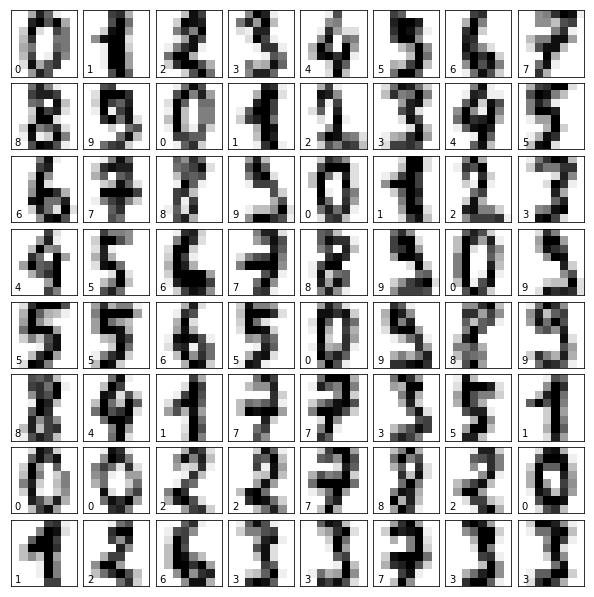

In [34]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot (for a jupyter it is not a necessity)
plt.show()

## Step 3 : PCA analysis

 you have used the RandomizedPCA() here because it performs better when there’s a high number of dimensions. Try replacing the randomized PCA model or estimator object with a regular PCA model and see what the difference is.

In [35]:
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(svd_solver='randomized', n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
# print(reduced_data_rpca)
# print(reduced_data_pca)

(1797, 2)

### Remark :
Instead of 64 features, now we have only 2 features (as we mentioned n_components=2)

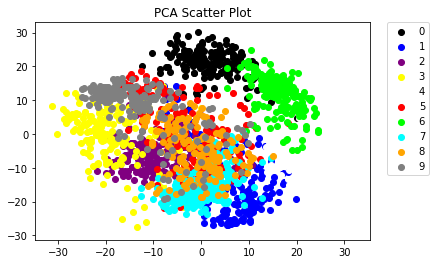

In [37]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for (i, color) in enumerate(colors):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=color)
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA Scatter Plot")
plt.show()

## Step 4 : Scaling and splitting the data

preprocessing : You can standardize the digits data by, for example, making use of the scale() method

In [45]:
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
data = scale(digits.data)

In [205]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Predict the labels for `X_test`
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
                                                            data, digits.target, digits.images, test_size=0.25, random_state=42)
print("we have {} lines in training set".format(X_train.shape[0]))
print("we have {} lines in test set".format(X_test.shape[0]))

we have 1347 lines in training set
we have 450 lines in test set


## Step 5 : running K means for clustering

In [202]:
# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data `X_train`to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

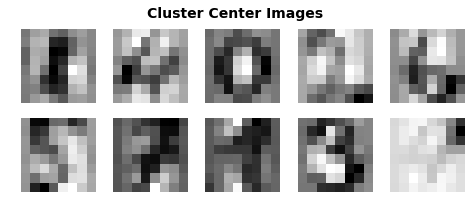

In [203]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')
plt.show()


We can see that the centroids does not repressent the clusters ordred from 0 to 9. Instead we have approximitly {0:8, 1:4, 2:0, 3:2, 4:6, 5:5, 6:7, 7:1, 8:3, 9:9}

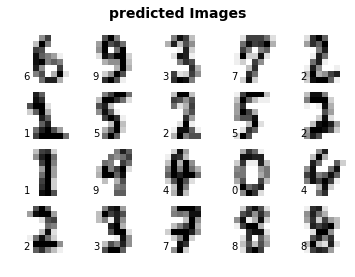

In [231]:
# Make the prediction
y_pred=clf.predict(X_test)

y_pred = [{0:8, 1:4, 2:0, 3:2, 4:6, 5:5, 6:7, 7:1, 8:3, 9:9}[i] for i in y_pred]

fig = plt.figure()

# Add title
fig.suptitle('predicted Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(20):
    
#     print("y_test = {0}, y_pred = {1}".format(y_test[i], y_pred[i]))
    ax = fig.add_subplot(4,5, 1 + i)
    # Display images
    ax.imshow(images_test[i].reshape((8, 8)), cmap=plt.cm.binary)
    
    ax.text(0, 7, str(y_test[i]))
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

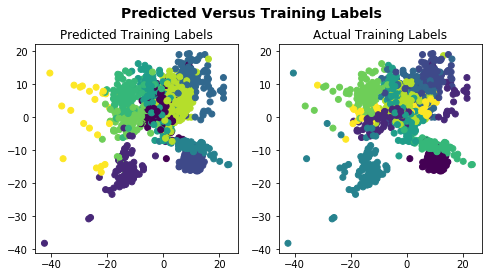

In [165]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

## Step 6 : visualizing the confusion matrix

In [166]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout

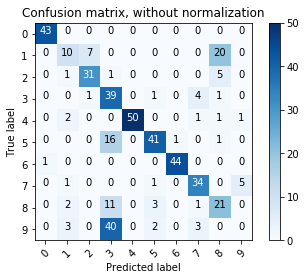

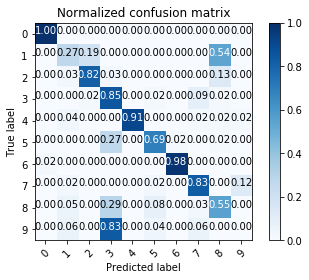

In [207]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

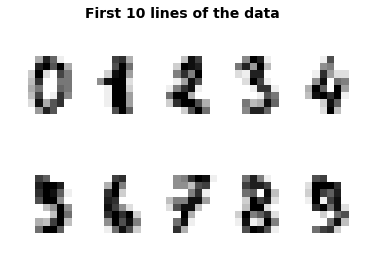

In [226]:
fig = plt.figure()

# Add title
fig.suptitle('First 10 lines of the data', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    
#     print("y_test = {0}, y_pred = {1}".format(y_test[i], y_pred[i]))
    ax = fig.add_subplot(2,5, 1 + i)
    # Display images
    ax.imshow(digits.images[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

Let's try initializing the centroid with these 10 images

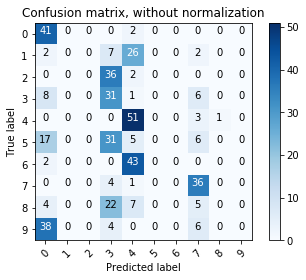

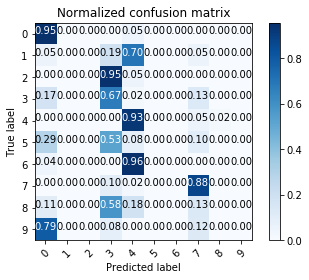

In [229]:
# # In this part we will try to cheat by initializing the centroids
clf = cluster.KMeans(n_clusters=10, init=digits.data[0:10], n_init=1)

# Fit the training data `X_train`to the model
clf.fit(X_train)

# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()